# Tumblr Starter Code

In this notebook we will be forecasting the future growth of Tumblr in terms of people using Tumbler. We will particularly be forecasting the worldwide userbase for Tumblr. Your goal will be to use this forecast to evaluate Tumblr. The code will forecast with three different models, then it will right out the forecasts. Based on this notebook you should be able to select a model output to evaluate Tumblr, which you should do in Excel.

In [1]:
import numpy as np
import pandas as pd
from math import *
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# This sets some nicer defaults for plotting.
# This must be run in a separate cell from importing matplotlib due to a bug.
params = {'legend.fontsize': 'large',
          'figure.figsize': (11.0, 11.0),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
mpl.rcParams.update(params)

# This makes it so that the pandas dataframes don't get truncated horizontally.
pd.options.display.max_columns = 200

## Load and explore data

In [3]:
df_tumblr = pd.read_csv("Tumblr.csv")

In [4]:
df_tumblr.head()

,People Worldwide,People US,US Percent
0,19020118,8600926,0.452202
1,21096692,9512435,0.450897
2,22496896,10510566,0.467201
3,24571154,11502011,0.468110
4,27744680,12490288,0.450187


In [5]:
df_tumblr.tail()

,People Worldwide,People US,US Percent
33,146146144,52908104,0.362022
34,140544144,51339176,0.365289
35,136447584,45887920,0.336304
36,138832112,46370232,0.334002
37,136477904,44818252,0.328392


We will scale the data so that the series is in units of millions.

In [6]:
df_tumblr['People Worldwide Scaled'] = df_tumblr['People Worldwide']/1000000

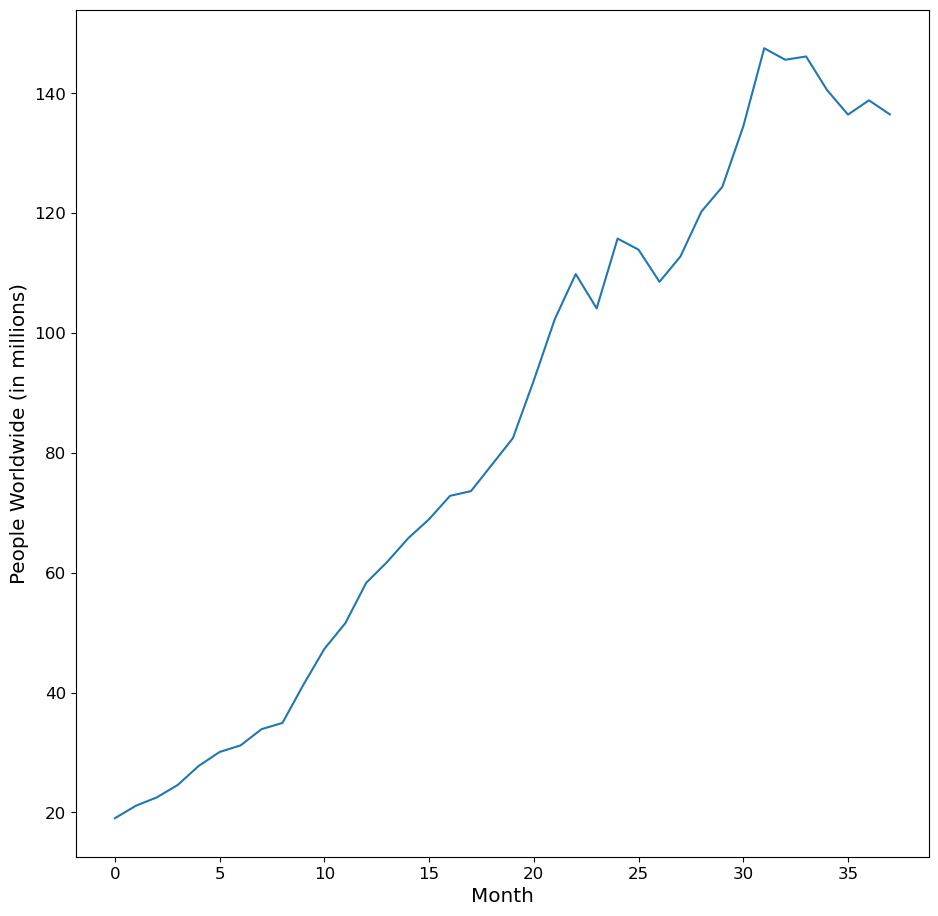

In [7]:
sns.lineplot(x=range(0,38), y=df_tumblr['People Worldwide Scaled'])
plt.xlabel("Month")
plt.ylabel("People Worldwide (in millions)")
plt.show()

## Fit models

We will build several different exponential smoothing models in order to compare additive trends and errors versus multiplicative trends and errors while also comparing damped trends versus undamped trends. In class we will discuss the difference between these models. The appropriate model to select is determined by the AIC value (lower is better). You can read more about the AIC [here](https://en.wikipedia.org/wiki/Akaike_information_criterion), but for this class you do not need to understand it beyond knowing that lower is better.

First, we will build an exponential smoothing model that has an additive error and additive (undamped) trend. The way we will name these models will be `ets_ERROR_TREND_DAMPED`, so this model will be called `ets_add_add_false`. Other models will follow this naming scheme. After we build the model, we will look at a summary which will tell us both the parameters of the model, and the goodness of fit (the AIC).

In [8]:
ets_add_add_false = ETSModel(df_tumblr['People Worldwide Scaled'], error="add", trend="add", damped_trend=False).fit()
ets_add_add_false.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70800D+00    |proj g|=  8.99900D-01

At iterate    1    f=  3.03805D+00    |proj g|=  6.90494D-02

At iterate    2    f=  3.03656D+00    |proj g|=  5.57516D-02

At iterate    3    f=  3.03300D+00    |proj g|=  1.34516D-01

At iterate    4    f=  2.96378D+00    |proj g|=  1.52525D-01

At iterate    5    f=  2.96356D+00    |proj g|=  8.82104D-02

At iterate    6    f=  2.95078D+00    |proj g|=  8.17725D-02

At iterate    7    f=  2.94180D+00    |proj g|=  3.58516D-02

At iterate    8    f=  2.93993D+00    |proj g|=  2.88013D-02

At iterate    9    f=  2.93453D+00    |proj g|=  2.06375D-02

At iterate   10    f=  2.92827D+00    |proj g|=  4.57967D-03

At iterate   11    f=  2.92806D+00    |proj g|=  3.18590D-04

At iterate   12    f=  2.92805D+00    |proj g|=  3.20766D-04

At iterate   13    f=  2.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                            ETS(AAN)   Log Likelihood                -111.265
Date:                     Mon, 03 Mar 2025   AIC                            232.529
Time:                             21:10:35   BIC                            240.717
Sample:                                  0   HQIC                           235.442
                                      - 38   Scale                           20.453
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.153      6.526      0.000       0.700       1.300
smoothing_trend  9.999e-05        nan        nan        nan         nan         nan
initial_level      15.8447      4.587      3.454      0.001       6.854      24.835
initial_trend       3.1746      0.745      4.260      0.000       1.714       4.635
===================================================================================
Ljung-Box (Q):                        1.19   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.55   Prob(JB):                         0.97
Heteroskedasticity (H):               9.65   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Second, we will build an exponential smoothing model that has a multiplicative error and additive (undamped) trend.

In [9]:
ets_mul_add_false = ETSModel(df_tumblr['People Worldwide Scaled'], error="mul", trend="add", damped_trend=False).fit()
ets_mul_add_false.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49897D+00    |proj g|=  8.99900D-01

At iterate    1    f=  2.67354D+00    |proj g|=  7.91273D-02

At iterate    2    f=  2.67162D+00    |proj g|=  6.01931D-02

At iterate    3    f=  2.66677D+00    |proj g|=  1.38592D-01

At iterate    4    f=  2.64011D+00    |proj g|=  1.40942D-01

At iterate    5    f=  2.63798D+00    |proj g|=  1.20635D-01

At iterate    6    f=  2.61171D+00    |proj g|=  2.32512D-02

At iterate    7    f=  2.61147D+00    |proj g|=  1.10192D-02

At iterate    8    f=  2.61136D+00    |proj g|=  1.07740D-02

At iterate    9    f=  2.61090D+00    |proj g|=  1.81463D-02

At iterate   10    f=  2.61035D+00    |proj g|=  2.54432D-02

At iterate   11    f=  2.60969D+00    |proj g|=  2.18299D-02

At iterate   12    f=  2.60899D+00    |proj g|=  1.27550D-02

At iterate   13    f=  2.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                            ETS(MAN)   Log Likelihood                 -99.136
Date:                     Mon, 03 Mar 2025   AIC                            208.272
Time:                             21:10:42   BIC                            216.460
Sample:                                  0   HQIC                           211.185
                                      - 38   Scale                            0.002
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.170      5.867      0.000       0.666       1.334
smoothing_trend     0.1670      0.181      0.923      0.356      -0.188       0.522
initial_level      16.7675      1.072     15.635      0.000      14.666      18.869
initial_trend       2.2110      0.802      2.756      0.006       0.639       3.783
===================================================================================
Ljung-Box (Q):                        0.40   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.82   Prob(JB):                         0.95
Heteroskedasticity (H):               1.08   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Third, we will build an exponential smoothing model that has an additive error and multiplicative (undamped) trend.

In [10]:
ets_add_mul_false = ETSModel(df_tumblr['People Worldwide Scaled'], error="add", trend="mul", damped_trend=False).fit()
ets_add_mul_false.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29333D+00    |proj g|=  7.84772D+00

At iterate    1    f=  4.32090D+00    |proj g|=  7.86712D-01

At iterate    2    f=  3.59753D+00    |proj g|=  7.53014D-01

At iterate    3    f=  3.42121D+00    |proj g|=  4.64475D-01

At iterate    4    f=  3.07478D+00    |proj g|=  1.59695D-01

At iterate    5    f=  3.05719D+00    |proj g|=  6.61035D-02

At iterate    6    f=  3.05318D+00    |proj g|=  7.31188D-02

At iterate    7    f=  3.03921D+00    |proj g|=  7.18492D-02

At iterate    8    f=  3.03742D+00    |proj g|=  4.09482D-02

At iterate    9    f=  3.03721D+00    |proj g|=  2.62160D-02

At iterate   10    f=  3.03699D+00    |proj g|=  1.83086D-02

At iterate   11    f=  3.03678D+00    |proj g|=  6.23732D-03

At iterate   12    f=  3.03675D+00    |proj g|=  2.39280D-03

At iterate   13    f=  3.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                            ETS(AMN)   Log Likelihood                -115.332
Date:                     Mon, 03 Mar 2025   AIC                            240.665
Time:                             21:10:45   BIC                            248.853
Sample:                                  0   HQIC                           243.578
                                      - 38   Scale                           25.337
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.134      7.467      0.000       0.737       1.262
smoothing_trend     0.2534      0.117      2.169      0.030       0.024       0.482
initial_level      17.6053      4.293      4.101      0.000       9.192      26.019
initial_trend       1.0804      0.171      6.324      0.000       0.746       1.415
===================================================================================
Ljung-Box (Q):                        0.10   Jarque-Bera (JB):                 3.95
Prob(Q):                              0.95   Prob(JB):                         0.14
Heteroskedasticity (H):               9.24   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Fourth, we will build an exponential smoothing model that has a multiplicative error and multiplicative (undamped) trend.

In [11]:
ets_mul_mul_false = ETSModel(df_tumblr['People Worldwide Scaled'], error="mul", trend="mul", damped_trend=False).fit()
ets_mul_mul_false.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72686D+00    |proj g|=  1.20223D+01

At iterate    1    f=  4.12766D+00    |proj g|=  5.03148D+00

At iterate    2    f=  3.91215D+00    |proj g|=  2.57661D+00

At iterate    3    f=  3.63514D+00    |proj g|=  5.05965D+00

At iterate    4    f=  3.28547D+00    |proj g|=  4.82104D+00

At iterate    5    f=  3.15337D+00    |proj g|=  4.06265D+00

At iterate    6    f=  2.92916D+00    |proj g|=  1.26478D+00

At iterate    7    f=  2.84448D+00    |proj g|=  5.84949D-01

At iterate    8    f=  2.68906D+00    |proj g|=  3.28713D-01

At iterate    9    f=  2.66974D+00    |proj g|=  2.27575D-01

At iterate   10    f=  2.66769D+00    |proj g|=  1.39926D-01

At iterate   11    f=  2.66098D+00    |proj g|=  3.11936D-01

At iterate   12    f=  2.65941D+00    |proj g|=  3.84073D-01

At iterate   13    f=  2.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                            ETS(MMN)   Log Likelihood                -100.041
Date:                     Mon, 03 Mar 2025   AIC                            210.082
Time:                             21:10:46   BIC                            218.270
Sample:                                  0   HQIC                           212.995
                                      - 38   Scale                            0.002
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.138      7.271      0.000       0.730       1.269
smoothing_trend     0.2018      0.099      2.036      0.042       0.008       0.396
initial_level      17.4380      0.824     21.167      0.000      15.823      19.053
initial_trend       1.0883      0.033     33.303      0.000       1.024       1.152
===================================================================================
Ljung-Box (Q):                        0.07   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.96   Prob(JB):                         0.98
Heteroskedasticity (H):               1.20   Skew:                            -0.05
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Now we will build the same models but using a damped trend. This will just require us to change `damped_trend=True`.

Exponential smoothing model that has an additive error and additive (damped) trend.

In [12]:
ets_add_add_true = ETSModel(df_tumblr['People Worldwide Scaled'], error="add", trend="add", damped_trend=True).fit()
ets_add_add_true.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.89367D+00    |proj g|=  8.99900D-01

At iterate    1    f=  3.02877D+00    |proj g|=  1.80000D-01

At iterate    2    f=  3.02292D+00    |proj g|=  1.65089D-01

At iterate    3    f=  2.97544D+00    |proj g|=  2.54802D-02

At iterate    4    f=  2.97509D+00    |proj g|=  1.46584D-02

At iterate    5    f=  2.97488D+00    |proj g|=  2.45978D-02

At iterate    6    f=  2.97472D+00    |proj g|=  3.46727D-02

At iterate    7    f=  2.97417D+00    |proj g|=  5.73729D-02

At iterate    8    f=  2.97367D+00    |proj g|=  6.08484D-02

At iterate    9    f=  2.97276D+00    |proj g|=  2.05158D-02

At iterate   10    f=  2.97198D+00    |proj g|=  6.39181D-02

At iterate   11    f=  2.96774D+00    |proj g|=  1.61976D-01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   12 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                           ETS(AAdN)   Log Likelihood                -111.177
Date:                     Mon, 03 Mar 2025   AIC                            234.354
Time:                             21:10:47   BIC                            244.180
Sample:                                  0   HQIC                           237.850
                                      - 38   Scale                           20.359
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.156      6.409      0.000       0.694       1.306
smoothing_trend  9.999e-05        nan        nan        nan         nan         nan
damping_trend       0.9800      0.017     56.103      0.000       0.946       1.014
initial_level      14.5431      4.780      3.043      0.002       5.175      23.911
initial_trend       4.5637      1.655      2.758      0.006       1.320       7.807
===================================================================================
Ljung-Box (Q):                        1.16   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.56   Prob(JB):                         0.77
Heteroskedasticity (H):               6.77   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Exponential smoothing model that has an multiplicative error and additive (damped) trend.

In [13]:
ets_mul_add_true = ETSModel(df_tumblr['People Worldwide Scaled'], error="mul", trend="add", damped_trend=True).fit()
ets_mul_add_true.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.73698D+00    |proj g|=  8.99900D-01

At iterate    1    f=  2.67024D+00    |proj g|=  1.80000D-01

At iterate    2    f=  2.66810D+00    |proj g|=  1.80000D-01

At iterate    3    f=  2.66303D+00    |proj g|=  5.05021D-02

At iterate    4    f=  2.66222D+00    |proj g|=  3.64053D-02

At iterate    5    f=  2.65979D+00    |proj g|=  4.72403D-02

At iterate    6    f=  2.64843D+00    |proj g|=  6.72370D-02
  ys=-2.343E-03  -gs= 1.033E-02 BFGS update SKIPPED

At iterate    7    f=  2.62311D+00    |proj g|=  7.05165D-03

At iterate    8    f=  2.62309D+00    |proj g|=  6.88822D-03

At iterate    9    f=  2.62307D+00    |proj g|=  6.91300D-03

At iterate   10    f=  2.62296D+00    |proj g|=  6.73448D-03

At iterate   11    f=  2.62262D+00    |proj g|=  1.78607D-02

At iterate   12    f=  2.62208D+00  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                           ETS(MAdN)   Log Likelihood                 -99.592
Date:                     Mon, 03 Mar 2025   AIC                            211.185
Time:                             21:10:48   BIC                            221.010
Sample:                                  0   HQIC                           214.680
                                      - 38   Scale                            0.002
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.117      8.530      0.000       0.770       1.230
smoothing_trend     0.2332        nan        nan        nan         nan         nan
damping_trend       0.9800        nan        nan        nan         nan         nan
initial_level      16.7927      1.059     15.855      0.000      14.717      18.869
initial_trend       2.2292      0.875      2.548      0.011       0.514       3.944
===================================================================================
Ljung-Box (Q):                        0.11   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.95   Prob(JB):                         0.98
Heteroskedasticity (H):               1.09   Skew:                             0.08
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Exponential smoothing model that has an additive error and multiplicative (damped) trend.

In [14]:
ets_add_mul_true = ETSModel(df_tumblr['People Worldwide Scaled'], error="add", trend="mul", damped_trend=True).fit()
ets_add_mul_true.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  4.36809D+00    |proj g|=  6.27828D+00

At iterate    1    f=  3.84540D+00    |proj g|=  7.59483D-01

At iterate    2    f=  3.79995D+00    |proj g|=  7.55190D-01

At iterate    3    f=  3.64676D+00    |proj g|=  7.23351D-01

At iterate    4    f=  3.52174D+00    |proj g|=  6.72720D-01

At iterate    5    f=  3.18422D+00    |proj g|=  4.97908D-01

At iterate    6    f=  3.11769D+00    |proj g|=  4.79162D-01

At iterate    7    f=  2.99045D+00    |proj g|=  1.73127D-01

At iterate    8    f=  2.97855D+00    |proj g|=  1.06423D-01

At iterate    9    f=  2.97279D+00    |proj g|=  2.63197D-02

At iterate   10    f=  2.97116D+00    |proj g|=  3.29379D-02

At iterate   11    f=  2.97033D+00    |proj g|=  2.87585D-02

At iterate   12    f=  2.96961D+00    |proj g|=  2.21752D-02

At iterate   13    f=  2.9


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                           ETS(AMdN)   Log Likelihood                -110.456
Date:                     Mon, 03 Mar 2025   AIC                            232.911
Time:                             21:10:48   BIC                            242.737
Sample:                                  0   HQIC                           236.407
                                      - 38   Scale                           19.601
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.152      6.568      0.000       0.702       1.298
smoothing_trend  9.999e-05        nan        nan        nan         nan         nan
damping_trend       0.9336      0.018     51.604      0.000       0.898       0.969
initial_level      16.1035      3.892      4.138      0.000       8.476      23.731
initial_trend       1.1940      0.084     14.208      0.000       1.029       1.359
===================================================================================
Ljung-Box (Q):                        0.44   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.80   Prob(JB):                         0.96
Heteroskedasticity (H):              10.17   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Exponential smoothing model that has a multiplicative error and multiplicative (damped) trend.

In [15]:
ets_mul_mul_true = ETSModel(df_tumblr['People Worldwide Scaled'], error="mul", trend="mul", damped_trend=True).fit()
ets_mul_mul_true.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.88903D+00    |proj g|=  1.43114D+01

At iterate    1    f=  3.67422D+00    |proj g|=  1.09095D+01

At iterate    2    f=  2.99656D+00    |proj g|=  1.72151D+00

At iterate    3    f=  2.97629D+00    |proj g|=  2.07780D+00

At iterate    4    f=  2.97385D+00    |proj g|=  2.92872D-01

At iterate    5    f=  2.97369D+00    |proj g|=  2.88967D-01

At iterate    6    f=  2.97315D+00    |proj g|=  2.86635D-01

At iterate    7    f=  2.97189D+00    |proj g|=  2.98869D-01

At iterate    8    f=  2.96803D+00    |proj g|=  3.62087D-01

At iterate    9    f=  2.95583D+00    |proj g|=  9.82320D-01

At iterate   10    f=  2.94729D+00    |proj g|=  2.78481D+00

At iterate   11    f=  2.93349D+00    |proj g|=  1.90623D+00

At iterate   12    f=  2.91196D+00    |proj g|=  5.77518D-01

At iterate   13    f=  2.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ETS Results                                    
===================================================================================
Dep. Variable:     People Worldwide Scaled   No. Observations:                   38
Model:                           ETS(MMdN)   Log Likelihood                 -97.351
Date:                     Mon, 03 Mar 2025   AIC                            206.702
Time:                             21:10:49   BIC                            216.527
Sample:                                  0   HQIC                           210.198
                                      - 38   Scale                            0.002
Covariance Type:                    approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.153      6.553      0.000       0.701       1.299
smoothing_trend  9.999e-05        nan        nan        nan         nan         nan
damping_trend       0.9569      0.012     79.415      0.000       0.933       0.981
initial_level      16.9167      0.825     20.508      0.000      15.300      18.533
initial_trend       1.1280      0.025     44.940      0.000       1.079       1.177
===================================================================================
Ljung-Box (Q):                        0.53   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.77   Prob(JB):                         0.70
Heteroskedasticity (H):               1.11   Skew:                             0.14
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Make Predictions

Now that we have our models, we will make predictions. To do that, we will use the `.get_predictions()` method. We are going to forecast 115 months into the future, starting from the end of our data. So, we will start our predictions at month `38`, and then we will go to month `37 + 115 = 152` (since our original data goes out to month `37` this takes us `115` months past it).

In [16]:
pred_add_add_false = ets_add_add_false.get_prediction(start=38, end=37+115)

The prediction allows us to not only get a prediction of the expected value, but to also get error bounds. The below gives us the prediction plus the 95% confidence interval around the prediction. We will use this to plot the error bars.

In [17]:
pred_add_add_false.summary_frame(alpha=0.5)

,mean,pi_lower,pi_upper
38,139.653059,136.602648,142.703469
39,142.827661,138.513729,147.141592
40,146.002262,140.718621,151.285904
41,149.176864,143.075586,155.278142
42,152.351466,145.529723,159.173209
...,...,...,...
148,488.859259,456.547471,521.171047
149,492.033861,459.575234,524.492488
150,495.208463,462.603629,527.813296
151,498.383064,465.632648,531.133481


Let's do this for all of the rest of the models.

In [18]:
pred_add_mul_false = ets_add_mul_false.get_prediction(start=38, end=37+115)
pred_mul_add_false = ets_mul_add_false.get_prediction(start=38, end=37+115)
pred_mul_mul_false = ets_mul_mul_false.get_prediction(start=38, end=37+115)
pred_add_add_true = ets_add_add_true.get_prediction(start=38, end=37+115)
pred_add_mul_true = ets_add_mul_true.get_prediction(start=38, end=37+115)
pred_mul_add_true = ets_mul_add_true.get_prediction(start=38, end=37+115)
pred_mul_mul_true = ets_mul_mul_true.get_prediction(start=38, end=37+115)

## Plot Predictions

Now let's visualize our predictions. In order to avoid some tedious repition, I'm going to define a function that will help me do some of the plotting stuff.

In [19]:
def make_subplot(model, axes, name):
    axes.set_title(name)
    axes.set_ylim(top=800)
    nrepetitions = 100
    simulated = model.simulate(anchor="end", nsimulations=115, repetitions=nrepetitions)
    for i in range(simulated.shape[1]):
        simulated.iloc[:,i].plot(label='_', color='gray', alpha=0.1, ax=axes)
    pred = model.get_prediction(start=38, end=37+115)
    df = pred.summary_frame(alpha=.05)
    df["mean"].plot(label='mean prediction', ax=axes)
    df["pi_lower"].plot(linestyle='--', color='tab:blue', label='95% interval', ax=axes)
    df["pi_upper"].plot(linestyle='--', color='tab:blue', label='_', ax=axes)
    df_tumblr['People Worldwide Scaled'].plot(label='Original Data', ax=axes)
    axes.set_xlabel("Month")
    axes.set_ylabel("People Worldwide (in millions)")
    axes.legend()

First, we will plot the models without damping. Note that we also simulate a bunch of possible futures to get a sense for the possible set of futures. The simulations are light gray.

/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


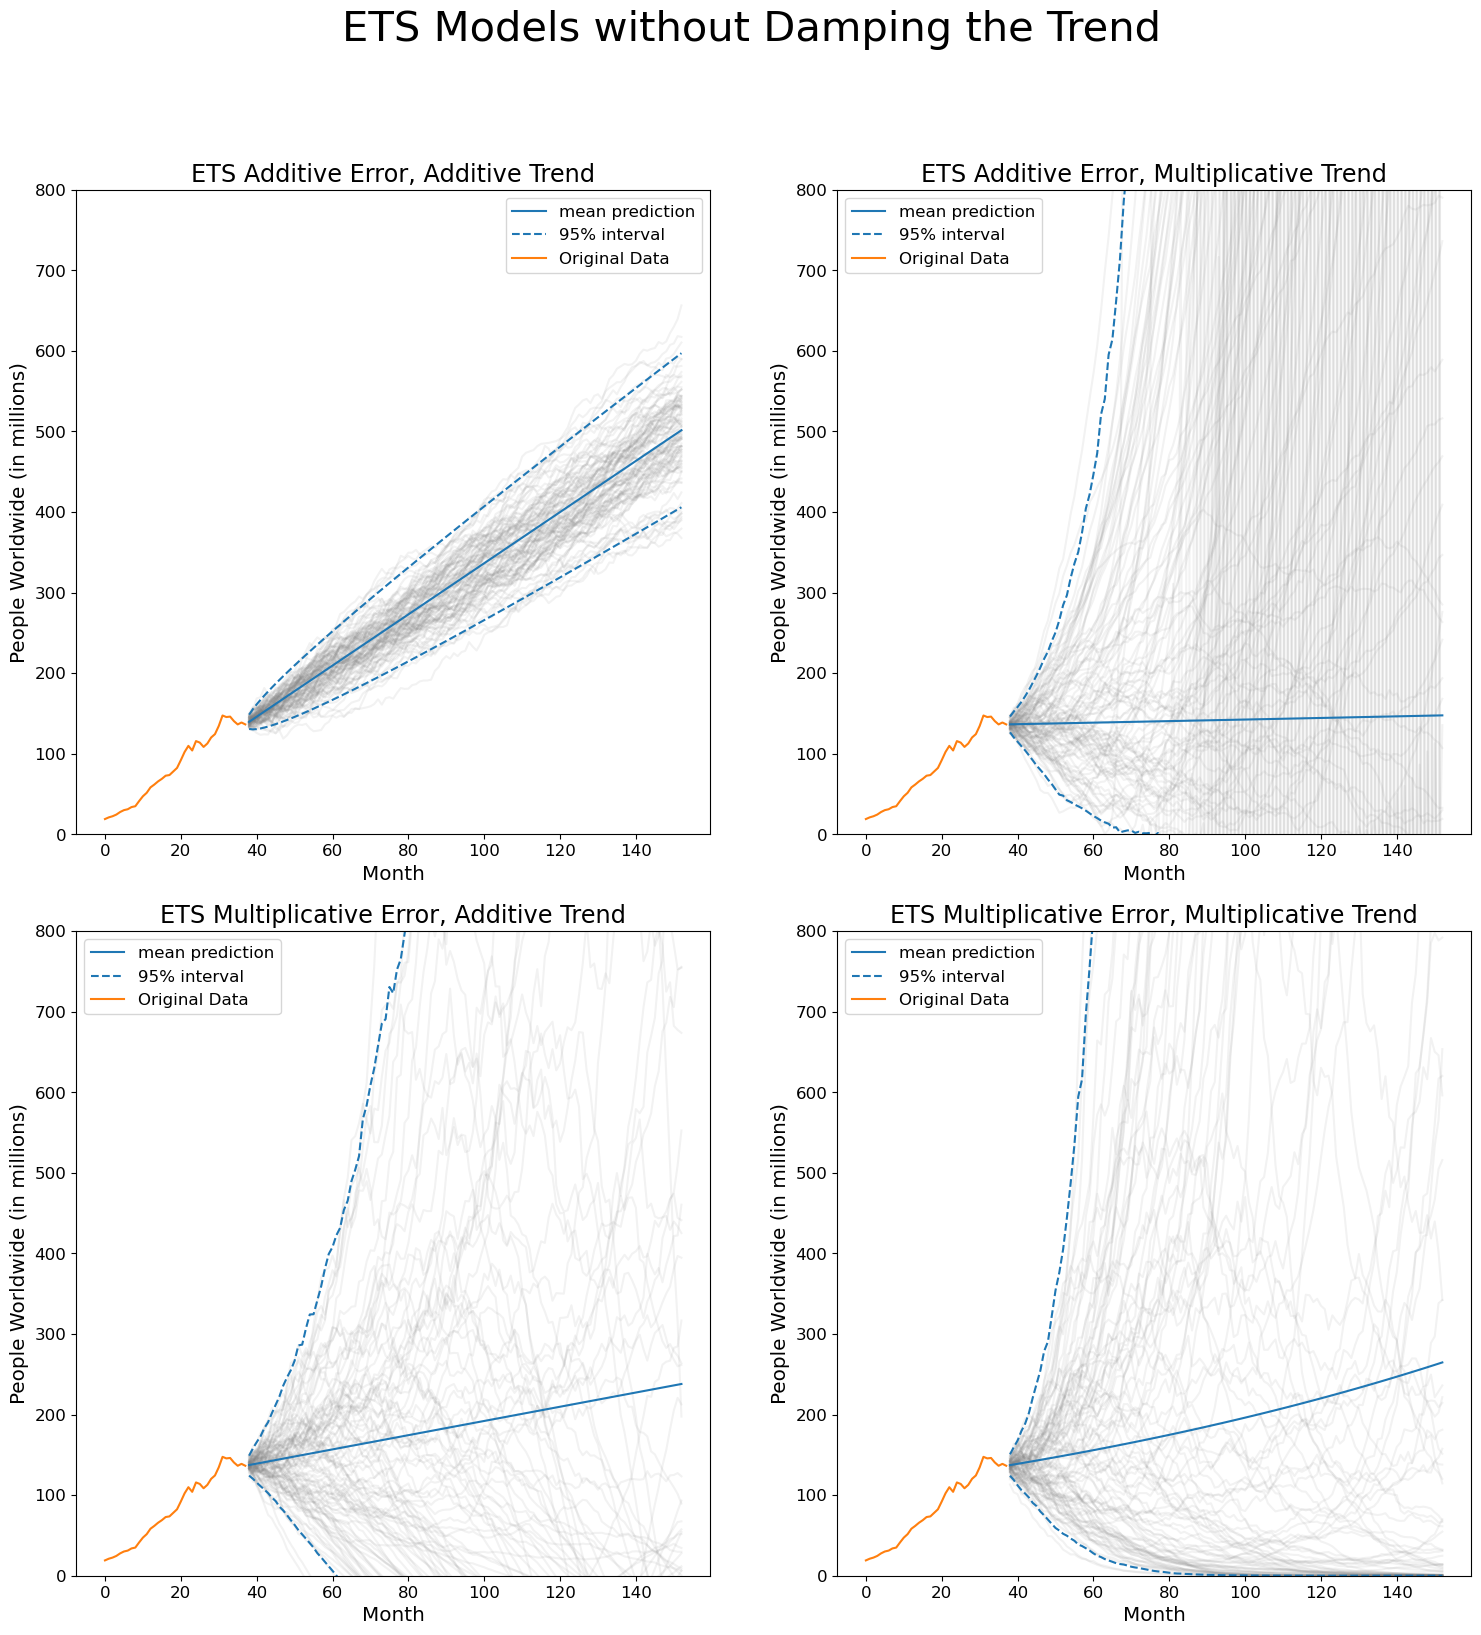

In [20]:
f, axes = plt.subplots(2,2, figsize=(18,18))
plt.subplots_adjust(hspace=.15)

f.suptitle("ETS Models without Damping the Trend", fontsize=30)

make_subplot(ets_add_add_false, axes[0][0], "ETS Additive Error, Additive Trend")
make_subplot(ets_add_mul_false, axes[0][1], "ETS Additive Error, Multiplicative Trend")
make_subplot(ets_mul_add_false, axes[1][0], "ETS Multiplicative Error, Additive Trend")
make_subplot(ets_mul_mul_false, axes[1][1], "ETS Multiplicative Error, Multiplicative Trend")

plt.show()

Now we plot the models with damping the trend.

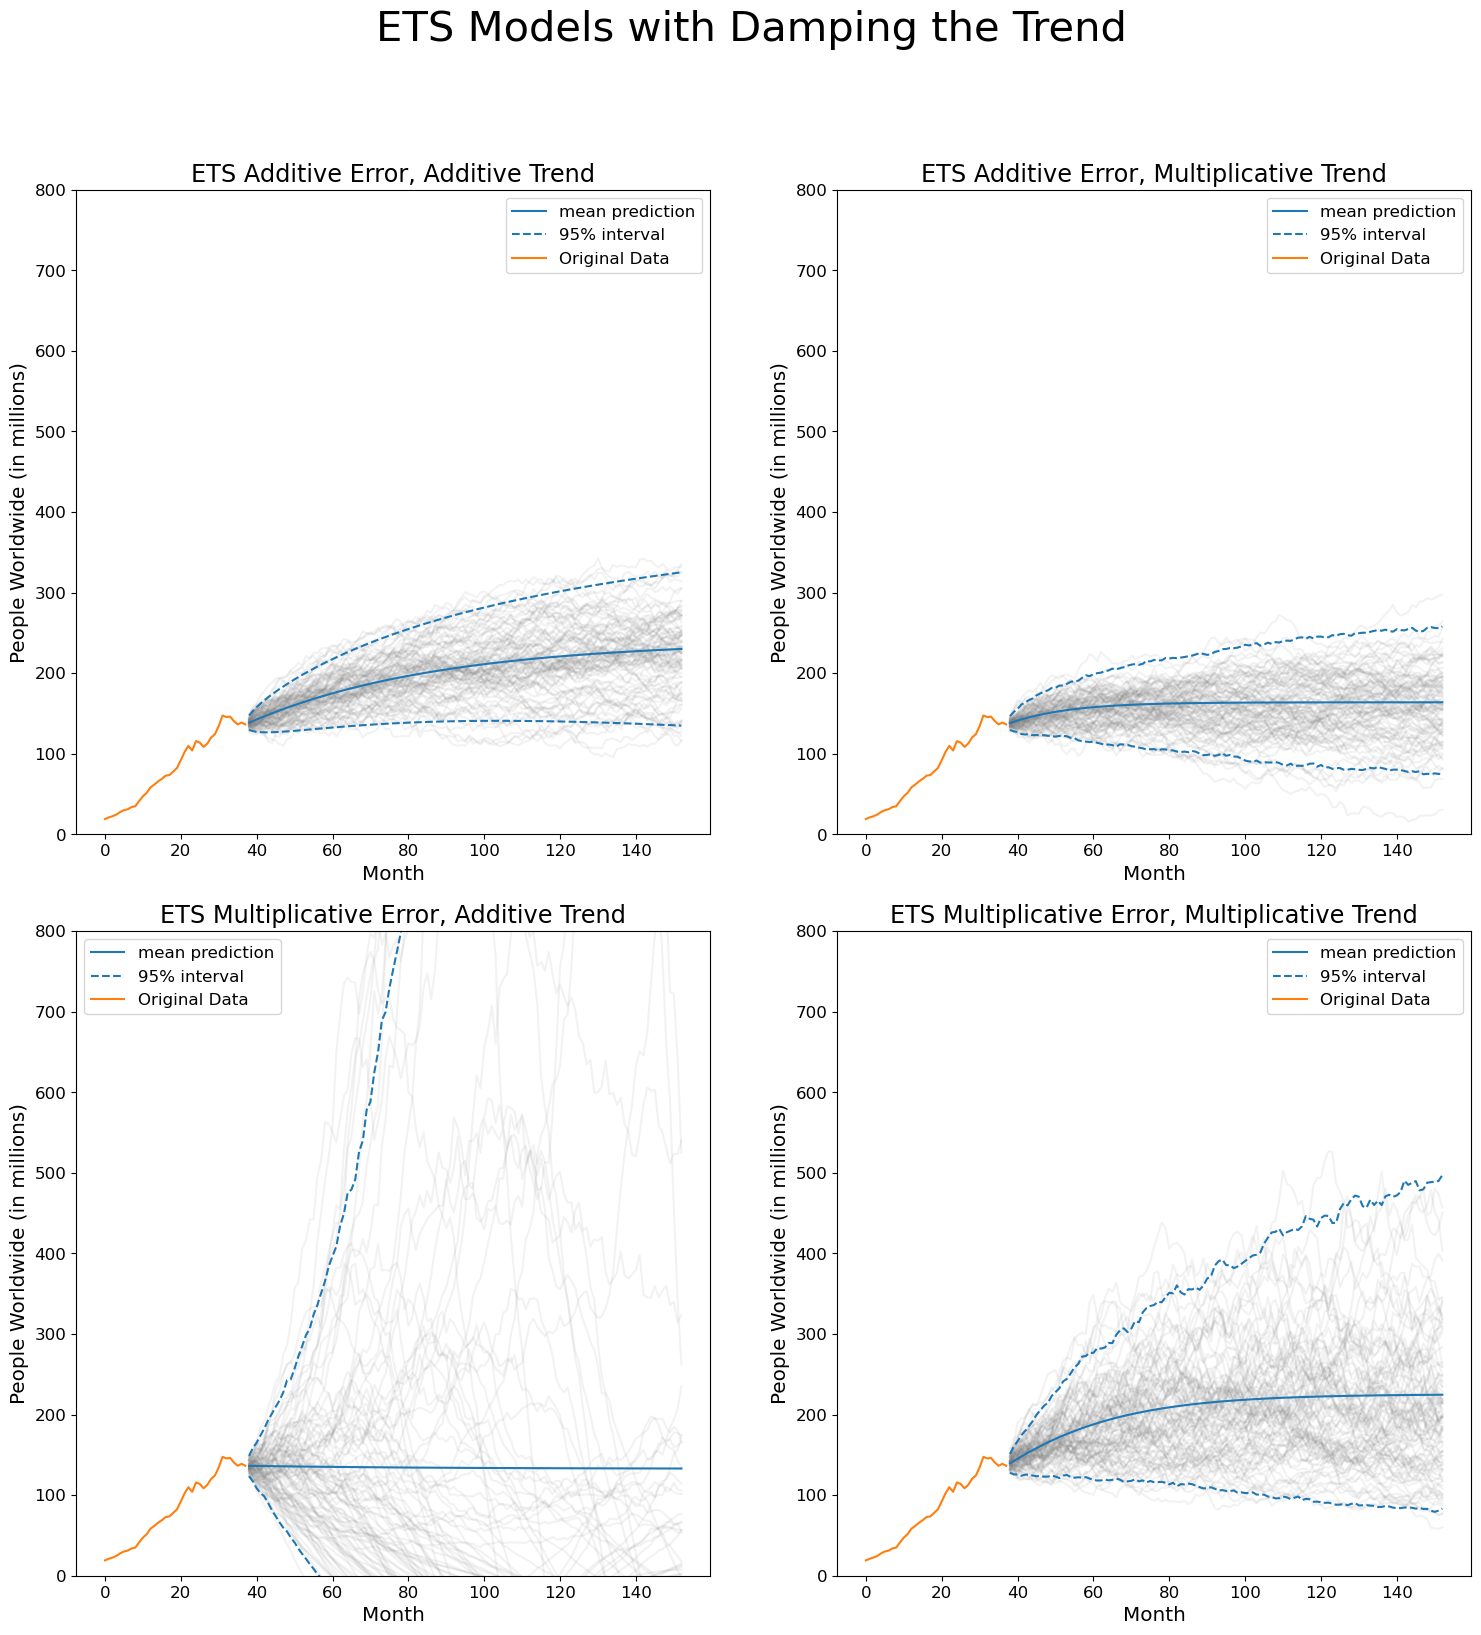

In [21]:
f, axes = plt.subplots(2,2, figsize=(18,18))
plt.subplots_adjust(hspace=.15)

f.suptitle("ETS Models with Damping the Trend", fontsize=30)

make_subplot(ets_add_add_true, axes[0][0], "ETS Additive Error, Additive Trend")
make_subplot(ets_add_mul_true, axes[0][1], "ETS Additive Error, Multiplicative Trend")
make_subplot(ets_mul_add_true, axes[1][0], "ETS Multiplicative Error, Additive Trend")
make_subplot(ets_mul_mul_true, axes[1][1], "ETS Multiplicative Error, Multiplicative Trend")

plt.show()

## Write predictions out to a dataframe

We will now save all of our predictions to a dataframe so that we can easily export them to a csv and use them in our excel model to forecast the valuation of Tumblr.

In [22]:
results_df = pd.DataFrame({'ets_add_add_false': pred_add_add_false.summary_frame()['mean'],
                           'ets_add_mul_false': pred_add_mul_false.summary_frame()['mean'],
                           'ets_mul_add_false': pred_mul_add_false.summary_frame()['mean'],
                           'ets_mul_mul_false': pred_mul_mul_false.summary_frame()['mean'],
                           'ets_add_add_true': pred_add_add_true.summary_frame()['mean'],
                           'ets_add_mul_true': pred_add_mul_true.summary_frame()['mean'],
                           'ets_mul_add_true': pred_mul_add_true.summary_frame()['mean'],
                           'ets_mul_mul_true': pred_mul_mul_true.summary_frame()['mean']},
                         index=range(38,37+115+1))

In [23]:
results_df

,ets_add_add_false,ets_add_mul_false,ets_mul_add_false,ets_mul_mul_false,ets_add_add_true,ets_add_mul_true,ets_mul_add_true,ets_mul_mul_true
38,139.653059,136.571878,137.360593,137.266711,138.554014,138.147554,136.402080,139.458837
39,142.827661,136.665588,138.242893,138.059677,140.588163,139.724371,136.327482,142.371721
40,146.002262,136.759363,139.125193,138.857224,142.581629,141.212726,136.254375,145.216048
41,149.176864,136.853201,140.007493,139.659379,144.535226,142.616560,136.182731,147.991011
42,152.351466,136.947104,140.889793,140.466167,146.449751,143.939771,136.112520,150.696046
...,...,...,...,...,...,...,...,...
148,488.859259,147.275171,234.413611,258.668823,229.240469,163.883293,133.076338,224.475633
149,492.033861,147.376226,235.295911,260.163108,229.460889,163.884264,133.068254,224.512156
150,495.208463,147.477349,236.178212,261.666026,229.676901,163.885171,133.060332,224.547111
151,498.383064,147.578542,237.060512,263.177626,229.888592,163.886017,133.052569,224.580564


# Save predictions to a csv file

Write the mean predictions to a csv file for use in your valuation model. 
You can open the csv file in Excel and copy and paste the forecasts into your valuation model.

In [24]:
results_df.to_csv("Tumblr forecast.csv")